Importation des librairies de Python nécessaires.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

Chargement des données ou bien simuler aléatoirement les données de la dimension
supérieur à 4.

In [38]:
X, y = make_blobs(n_samples=500, n_features=5, centers=4, random_state=42)
print(f"Taille des données: {X.shape}")

Taille des données: (500, 5)


Visualisez et donner la taille des données

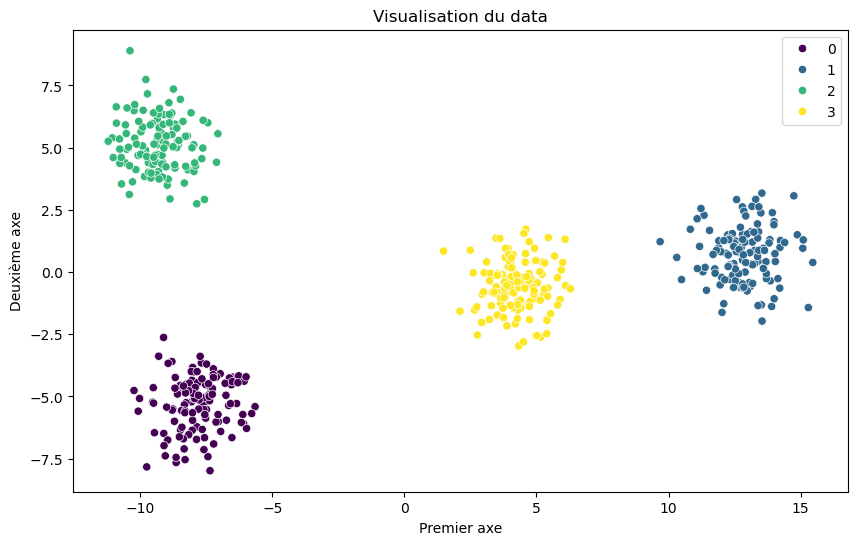

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Premier axe')
plt.ylabel('Deuxième axe')
plt.title('Visualisation du data')
plt.show()

Implémentez l’algorithme K-moyenne

Aléatoire

In [40]:
kmeans_random = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
kmeans_random.fit(X)
labels_random = kmeans_random.labels_
centers_random = kmeans_random.cluster_centers_
print("Aléatoire clusters Initialisation")
print(centers_random)

Aléatoire clusters Initialisation
[[-2.47555395  8.91844236  4.75402806  1.96802416 -6.95204041]
 [-6.98354008 -8.7518611   7.37901293  2.28804852  4.26234467]
 [-9.50789054  9.53000845  6.61491931 -5.63366645 -6.39047321]
 [-6.3345608  -3.93976884  0.39820355 -1.39284558 -3.97753497]]


K-means++

In [41]:
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(X)
labels_plus = kmeans_plus.labels_
centers_plus = kmeans_plus.cluster_centers_
print("K-means++ clusters Initialisation ")
print(centers_plus)

K-means++ clusters Initialisation 
[[-2.47555395  8.91844236  4.75402806  1.96802416 -6.95204041]
 [-6.98354008 -8.7518611   7.37901293  2.28804852  4.26234467]
 [-6.3345608  -3.93976884  0.39820355 -1.39284558 -3.97753497]
 [-9.50789054  9.53000845  6.61491931 -5.63366645 -6.39047321]]


Visualisation avec les deux stratégies

In [42]:
centers_plus_pca = pca.transform(centers_plus)
centers_random_pca = pca.transform(centers_random)

Visualisation aléatoire

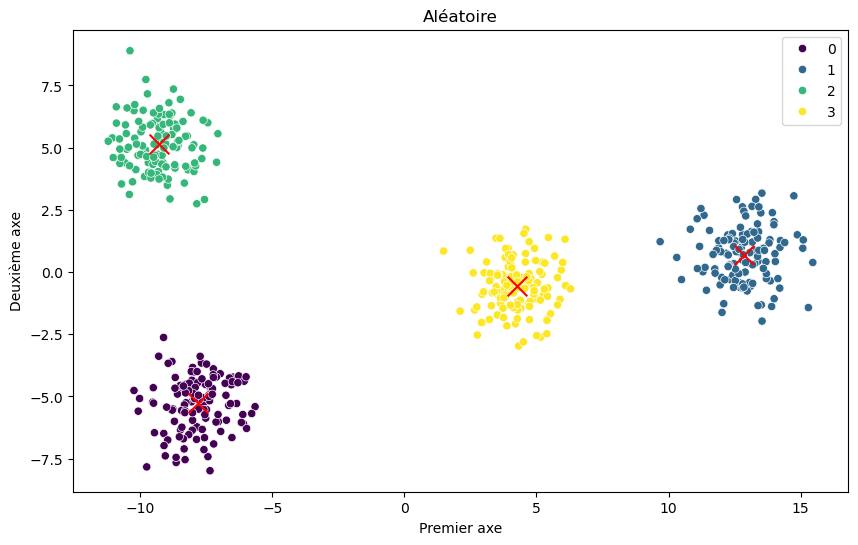

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_random, palette='viridis')
plt.scatter(centers_random_pca[:, 0], centers_random_pca[:, 1], c='red', marker='x', s=200)
plt.xlabel('Premier axe')
plt.ylabel('Deuxième axe')
plt.title('Aléatoire')
plt.show()

Visualisation K-means++

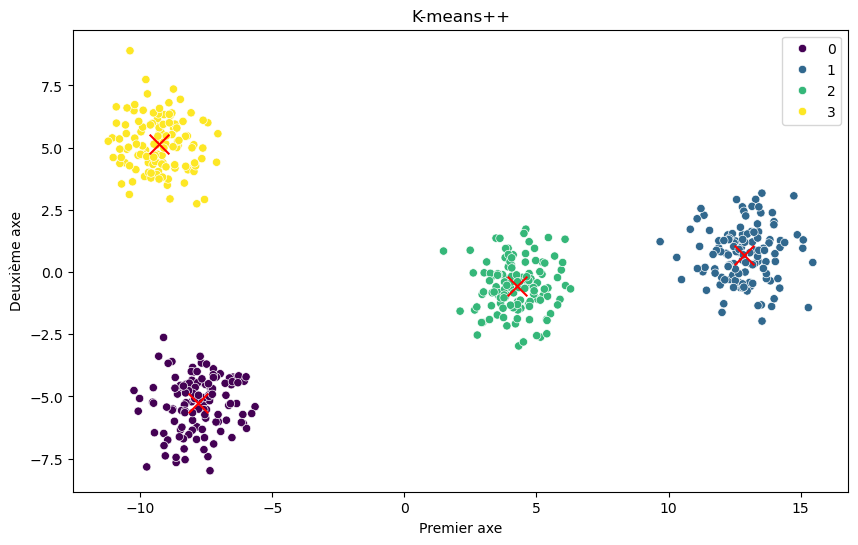

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_plus, palette='viridis')
plt.scatter(centers_plus_pca[:, 0], centers_plus_pca[:, 1], c='red', marker='x', s=200)
plt.xlabel('Premier axe')
plt.ylabel('Deuxième axe')
plt.title('K-means++')
plt.show()

méthodes de validation de Clustering.

In [45]:
# Silhouette score
silhouette_avg_random = silhouette_score(X, labels_random)
silhouette_avg_plus = silhouette_score(X, labels_plus)
# Calinski-Harabasz index
calinski_harabasz_random = calinski_harabasz_score(X, labels_random)
calinski_harabasz_plus = calinski_harabasz_score(X, labels_plus)

Interprétez les résultats

In [46]:
print(f'Silhouette Score (Random): {silhouette_avg_random:.3f}')
print(f'Silhouette Score (K-means++): {silhouette_avg_plus:.3f}')
print(f'Calinski-Harabasz Index (Random): {calinski_harabasz_random:.3f}')
print(f'Calinski-Harabasz Index (K-means++): {calinski_harabasz_plus :.3f}')

Silhouette Score (Random): 0.747
Silhouette Score (K-means++): 0.747
Calinski-Harabasz Index (Random): 3715.491
Calinski-Harabasz Index (K-means++): 3715.491


Basé sur les métriques de validation obtrenues, les deux modèles de clustering K-Means avec initialisation aléatoire et initialisation K-means++ ont la même performance :

    Silhouette Score (Initialisation aléatoire) : 0.747
    Silhouette Score (Initialisation K-means++) : 0.747
    Indice de Calinski-Harabasz (Initialisation aléatoire) : 3715.491
    Indice de Calinski-Harabasz (Initialisation K-means++) : 3715.491

le meilleur modèle de Clustering

Puisque les scores de validation sont identiques pour les deux modèles, il n'y a pas de "meilleur" modèle clair basé sur les informations données. 
Les stratégies d'initialisation aléatoire et d'initialisation K-means++ ont toutes deux donné des résultats de clustering également bons pour ce jeu de données.

Peut on représenter les données avec les poids des centres obtenus ?

Oui, il est possible de représenter les données avec les poids des centres obtenus par l'algorithme K-Means. Cette représentation peut être utile pour visualiser la répartition des données par rapport aux centroïdes de chaque cluster.

l’analyse en composantes principales

nouvelle matrice des observations.

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 1.13447932e+01,  2.28643792e+00],
       [-7.43938042e+00,  6.00222435e+00],
       [-9.20866566e+00,  4.41724049e+00],
       [-1.05715813e+01,  4.39376626e+00],
       [-7.61055439e+00, -5.33125005e+00],
       [-8.56835551e+00,  5.08576523e+00],
       [ 4.20496288e+00, -2.07874122e+00],
       [ 1.33014086e+01,  2.92341356e+00],
       [-9.64302091e+00,  4.44946989e+00],
       [ 4.28947862e+00, -1.18743711e+00],
       [-7.49200832e+00, -5.52426104e+00],
       [ 1.20916688e+01, -1.27208021e+00],
       [ 1.22440633e+01,  1.49471669e+00],
       [ 1.39047403e+01, -1.38195121e+00],
       [ 1.29005389e+01,  1.85360451e-03],
       [-7.56610579e+00,  2.91849003e+00],
       [-7.64404327e+00, -4.44114034e+00],
       [ 1.27987972e+01,  1.50719819e+00],
       [-8.68238893e+00,  4.18133930e+00],
       [-9.83515221e+00,  3.84074937e+00],
       [ 3.02191158e+00, -2.87375477e-02],
       [ 3.81937140e+00, -2.34246559e-01],
       [-1.05067667e+01,  4.93999659e+00],
       [-8.

les valeurs propres et les vecteurs propres associes aux axes principaux.

In [49]:
eigenvectors = pca.components_
print("Vecteurs propres :")
print(eigenvectors)

eigenvalues = pca.explained_variance_
print("Valeurs propres :")
print(eigenvalues)

Vecteurs propres :
[[-0.0275173  -0.86927694 -0.00647878  0.18277972  0.45842121]
 [-0.67774994 -0.03427744  0.25389588 -0.66923612  0.16474214]]
Valeurs propres :
[83.73533925 14.84968182]


l’inertie de chaque axe.

In [50]:
explained_variance_ratio = pca.explained_variance_ratio_
print("l’inertie de chaque axe :")
print(explained_variance_ratio)

l’inertie de chaque axe :
[0.7437459 0.1318964]


Vérifier que la somme des inerties de chaque axe égal la dimension de la base de
données.

In [51]:
sum_explained_variance_ratio = np.sum(explained_variance_ratio)
print(f"Somme inerties : {sum_explained_variance_ratio:.3f}")

Somme inerties : 0.876


Représenter les données ainsi que les centres obtenus

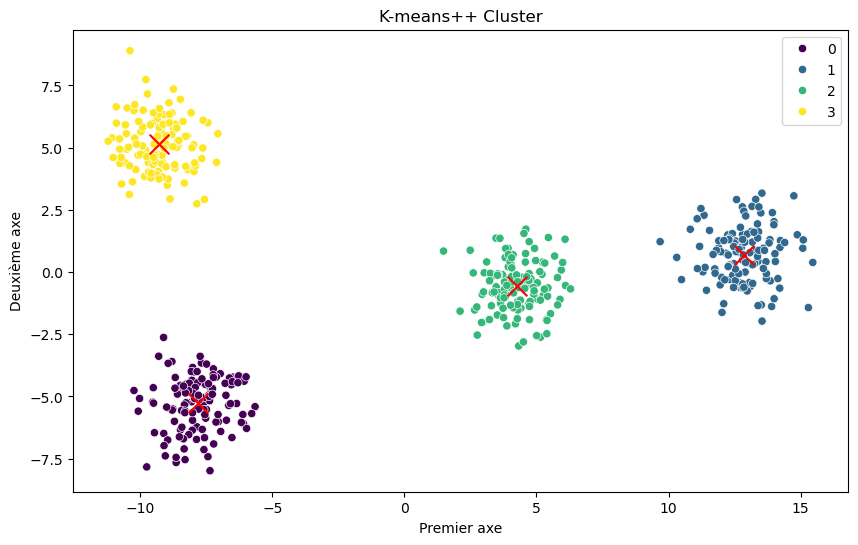

In [52]:
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(X)
labels_plus = kmeans_plus.labels_
centers_plus = kmeans_plus.cluster_centers_
centers_plus_pca = pca.transform(centers_plus)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_plus, palette='viridis')
plt.scatter(centers_plus_pca[:, 0], centers_plus_pca[:, 1], c='red', marker='x', s=200)
plt.xlabel('Premier axe')
plt.ylabel('Deuxième axe')
plt.title('K-means++ Cluster')
plt.show()

 Interprétation des résultats de l'analyse en composantes principales (PCA) 



    La PCA a permis de réduire la dimensionnalité des données tout en conservant une part importante de l'inertie (variance) initiale.
    L'analyse des valeurs propres et des vecteurs propres associés aux axes principaux fournit des informations sur les directions de plus grande variance dans les données.
    La représentation des données et des centres des clusters sur les deux premiers axes principaux permet de visualiser la structure et la répartition des groupes dans cet espace de plus faible dimension.
    Cette visualisation PCA complémentaire aux résultats du clustering K-Means peut aider à mieux comprendre la structure sous-jacente des données et la pertinence des groupes identifiés.

En résumé, l'interprétation conjointe des résultats du clustering K-Means et de l'analyse PCA permet d'avoir une compréhension plus approfondie de la structure et des caractéristiques des données étudiées.